In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
data = pd.read_csv("/Users/carlbechtolsheim/code/Niki827/watt_squad/raw_data/train.csv")

In [119]:
# Converting time to datetime
data['time']= pd.to_datetime(data['time'])

In [120]:
#creating columns indicating the hour and the month
data['hour'] = data['time'].dt.hour
data['month'] = data['time'].dt.month

In [121]:
#creating column indicating the season
def assign_season(month):
    if month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    elif month in [9, 10, 11]:
        return 3  # Fall
    else:  # December, January, February
        return 4  # Winter

data['season'] = data['month'].apply(assign_season)    

In [122]:
#Creating columns considering cyclical patterns
data['hour_sine'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cosine'] = np.cos(2 * np.pi * data['hour'] / 24)

data['month_sine'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cosine'] = np.cos(2 * np.pi * data['month'] / 12)

data['season_sine'] = np.sin(2 * np.pi * data['season'] / 4)
data['season_cosine'] = np.cos(2 * np.pi * data['season'] / 4)

In [123]:
data = data.drop(columns = ['hour', 'month', 'season'])

In [127]:
data['clear_sky_rad:W'].describe()

count    9515.000000
mean      144.807325
std       232.985222
min         0.000000
25%         0.000000
50%         0.000000
75%       220.800000
max       834.800000
Name: clear_sky_rad:W, dtype: float64

<Axes: >

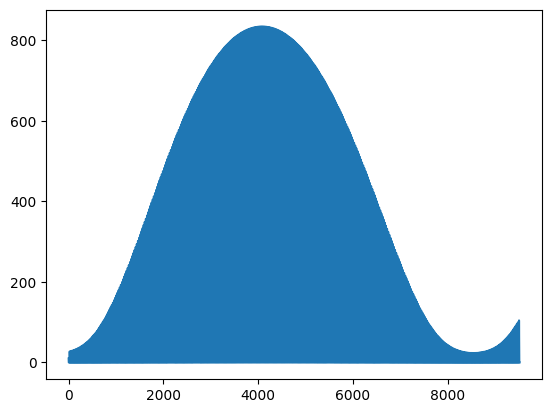

In [131]:
data['clear_sky_rad:W'].plot()

<Axes: xlabel='clear_sky_rad:W', ylabel='Count'>

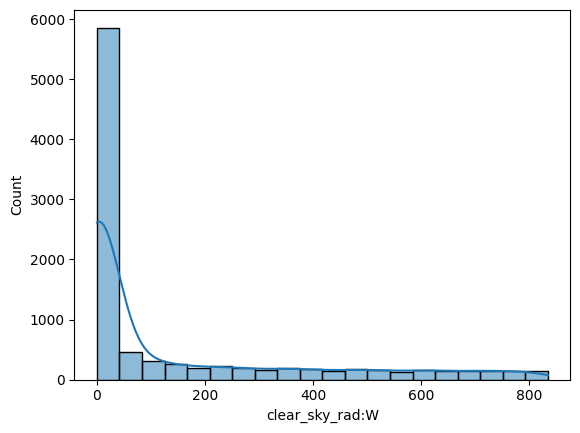

In [144]:
sns.histplot(data['clear_sky_rad:W'], bins = 20, kde=True)

<Axes: xlabel='clear_sky_rad:W'>

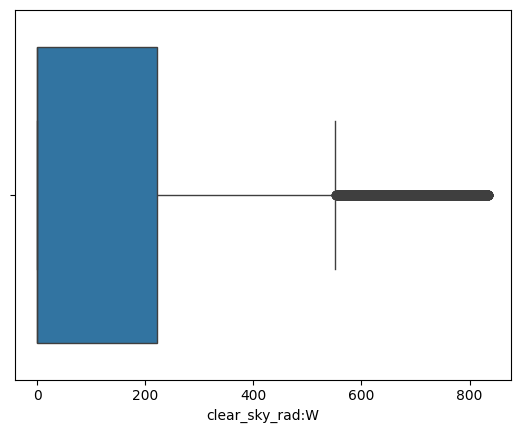

In [146]:
sns.boxplot(data, x = data['clear_sky_rad:W'])

In [153]:
eps = 1e-5
data['clear_sky_rad:W']= np.log(data['clear_sky_rad:W'] + eps)

<Axes: xlabel='clear_sky_rad:W', ylabel='Count'>

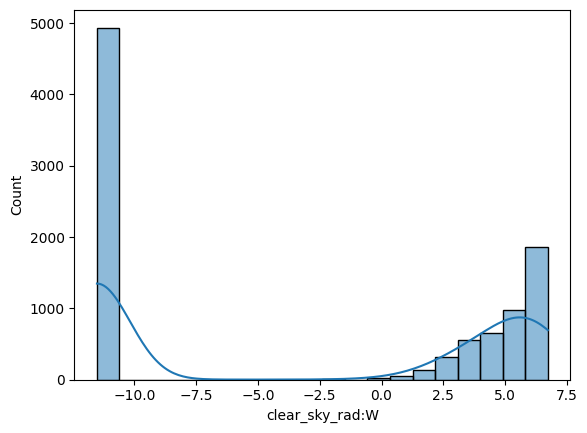

In [154]:
sns.histplot(data['clear_sky_rad:W'], bins = 20, kde=True)

<Axes: xlabel='clear_sky_rad:W'>

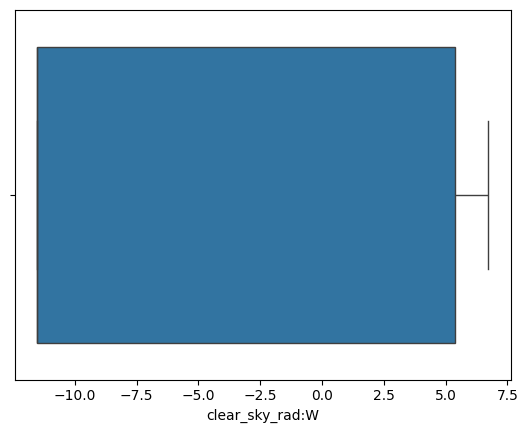

In [155]:
sns.boxplot(data, x = data['clear_sky_rad:W'])